To combine the advantages of the GRU module which can well process time sequence data and the advantages of the CNN module which is ideal for handling high-dimensional data, the GRU-CNN hybrid neural networks was proposed, and the structure of GRU-CNN hybrid neural networks is shown in Figure 1

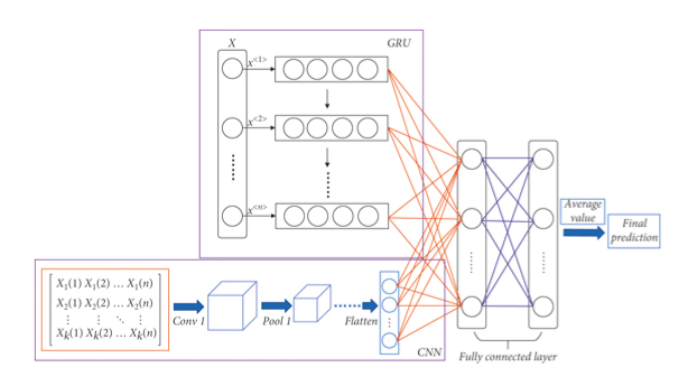

Figure 1

The framework of the proposed GRU-CNN hybrid neural networks consists of a GRU module and a CNN module. The inputs are the information of time sequence data and spatiotemporal matrixes collected from the power system; the outputs are the prediction of the future load value. In aspect of the CNN module, it is good at processing two-dimensional data, such as spatiotemporal matrixes and images. The CNN module uses local connection and shared weights to directly extract local features from the spatiotemporal matrixes data and obtain effective representation through the convolution layer and pooling layer. The structure of the CNN module contains two convolution layers and a flatten operation, and each convolution layer contains a convolution operation and a pooling operation. After the second pooling operation, the high-dimensional data are flattened into one-dimensional data, and the outputs of the CNN module are connected with the fully connected layer. On the other hand, the aim of the GRU module is to capture the long-term dependency and the GRU module can learn useful information in the historical data for a long period through the memory cell, and the useless information will be forgotten by the forget gate. The inputs of GRU module are time sequence data; the GRU module contains many gated recurrent units, and the outputs of all these gated recurrent units are connected with the fully connected layer. Finally, the load predicting results can be obtained by calculating the mean value of all neurons in the fully connected layers. The flow chart of the GRU-CNN method is shown in Figure 2.

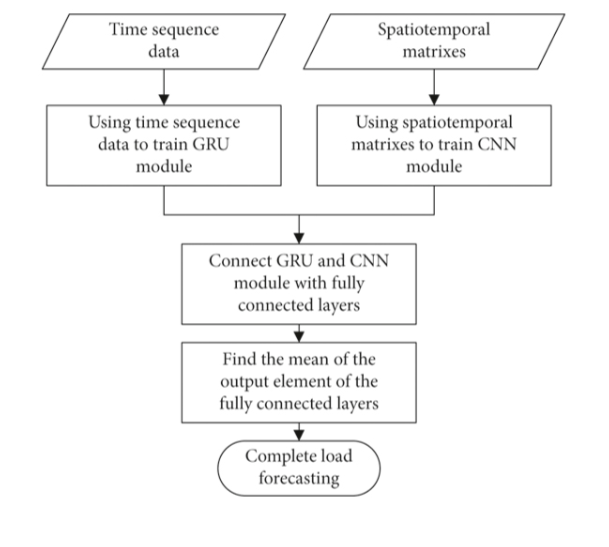

Figure 2

In [ ]:
# Импорт необходимых библиотек
from sklearn.feature_extraction.text import CountVectorizer # Для векторизации текста
from sklearn.model_selection import train_test_split # Для разделения данных на обучающую и тестовую выборки
from keras.models import Sequential # Для создания модели
from keras.layers import Dense # Для добавления слоев в модель
from keras.optimizers import SGD # Для оптимизации модели с помощью Stochastic gradient descent
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Загрузка данных из файлов True.csv и Fake.csv
fake = pd.read_csv('/content/drive/MyDrive/english_data/Fake.csv', delimiter = ',')
true = pd.read_csv('/content/drive/MyDrive/english_data/True.csv', delimiter = ',')
# Добавление меток классов
fake['target'] = 0
true['target'] = 1

In [ ]:
# Объединение двух наборов данных
import random
data = pd.concat([true, fake], ignore_index=True)

In [ ]:
#da=data['text']
#da=np.array(da)
#random.shuffle(da) #перемешиваем данные True и Fake news
index=list(range(len(data)))
random.shuffle(index)#перемешиваем индексы True и Fake news

In [ ]:
import numpy as np
da=np.array(data['text'])
ad=np.array(data['target'])
da=da[index]
ad=ad[index]

In [ ]:
# Векторизация текста
import numpy as np
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(da[:2000]) # Преобразование текста в числовые векторы
y = np.array(ad[:2000]) # Извлечение меток классов
y=y.reshape(2000,1)

In [ ]:
X=X.toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape

(400, 30501)

In [ ]:
# Изменяем размерность входных данных
X_train = np.expand_dims(X_train, axis=-1)

In [ ]:
X_train[0]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_train[0].shape

(1,)

In [ ]:
y_train[0]

array([0])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense

model = Sequential()

# Сверточный слой с 32 фильтрами размера ядра 3 и функцией активации relu
# model.add(Conv1D(32, 3, activation='relu', input_shape=(None, 1,30784)))
model.add(Conv1D(32, 3, activation='relu', input_shape=(30501,1)))

# Слой максимальной подвыборки с размером окна 2
model.add(MaxPooling1D(pool_size=2))

# Слой GRU с 64 нейронами и функцией активации tanh
model.add(GRU(64, activation='tanh'))

# Слой dropout с коэффициентом отсева 0.5
model.add(Dropout(0.5))

# Полносвязный слой с 1 выходом и функцией активации sigmoid
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели с оптимизатором adam и функцией потерь binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30499, 32)         128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 15249, 32)         0         
 D)                                                              
                                                                 
 gru (GRU)                   (None, 64)                18816     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32) # Обучение модели на обучающей выборке в течение 10 эпох с размером пакета 32

Epoch 1/10
13/13 [==============================] - 19s 343ms/step - loss: 0.6925
Epoch 2/10
13/13 [==============================] - 5s 390ms/step - loss: 0.6923
Epoch 3/10
13/13 [==============================] - 4s 337ms/step - loss: 0.6908
Epoch 4/10
13/13 [==============================] - 4s 346ms/step - loss: 0.6907
Epoch 5/10
13/13 [==============================] - 5s 382ms/step - loss: 0.6903
Epoch 6/10
13/13 [==============================] - 5s 414ms/step - loss: 0.6898
Epoch 7/10
13/13 [==============================] - 5s 402ms/step - loss: 0.6893
Epoch 8/10
13/13 [==============================] - 5s 346ms/step - loss: 0.6897
Epoch 9/10
13/13 [==============================] - 4s 338ms/step - loss: 0.6894
Epoch 10/10
13/13 [==============================] - 5s 391ms/step - loss: 0.6881


In [ ]:
# Оценка качества модели на тестовой выборке
results = model.evaluate(X_test, y_test) # Оценка функции потерь и точности на тестовой выборке
print('Test accuracy:', results)

50/50 [==============================] - 8s 161ms/step - loss: 0.6920
Test accuracy: 0.6919901371002197
